# Proyek Analisis Data: E-commerce
- **Nama:** Muhammad Rizki
- **Email:** mrizki.study@gmail.com
- **ID Dicoding:** muhammad_rizki23

## Menentukan Pertanyaan Bisnis

- Produk apa yang memiliki penjualan tertinggi dan terendah?
- Bagaimana tingkat kepuasan customer?
- Bagaimana performa penjualan E-Commerce seiring berjalannya waktu?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import datetime as dt

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [99]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [84]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


- Customers datasets: This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.
- Geolocation Dataset: This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.
- Order Items Dataset: This dataset includes data about the items purchased within each order.
- Order Payments Dataset: This dataset includes data about the orders payment options.
- Order Reviews Dataset: This dataset includes data about the reviews made by the customers.
- Order Dataset: This is the core dataset. From each order you might find all other information.
- Product category name translation: Translates the product_category_name to english.
- Products Dataset: This dataset includes data about the products sold
- Sellers Dataset: This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

### Assessing Data

#### Menilai data

In [12]:
print('\n', customers_df.info())
print('\n', geolocation_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_name_translation_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

#### Jumlah missing value pada setiap DataFrame

In [13]:
print('\nJumlah misssing value customers:\n', customers_df.isna().sum())
print('\nJumlah misssing value geolocation:\n', geolocation_df.isna().sum())
print('\nJumlah misssing value order_items:\n', order_items_df.isna().sum())
print('\nJumlah misssing value order_payments:\n', order_payments_df.isna().sum())
print('\nJumlah misssing value order_reviews:\n', order_reviews_df.isna().sum())
print('\nJumlah misssing value orders:\n', orders_df.isna().sum())
print('\nJumlah misssing value product_category_name_translation:\n', product_category_name_translation_df.isna().sum())
print('\nJumlah misssing value products:\n', products_df.isna().sum())
print('\nJumlah misssing value sellers:\n', sellers_df.isna().sum())


Jumlah misssing value customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah misssing value geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah misssing value order_items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah misssing value order_payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah misssing value order_reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_c

#### Jumlah data duplikat pada setiap DataFrame

In [14]:
print('\nJumlah data duplikat customers:\n', customers_df.duplicated().sum())
print('\nJumlah data duplikat geolocation:\n', geolocation_df.duplicated().sum())
print('\nJumlah data duplikat order_items:\n', order_items_df.duplicated().sum())
print('\nJumlah data duplikat order_payments:\n', order_payments_df.duplicated().sum())
print('\nJumlah data duplikat order_reviews:\n', order_reviews_df.duplicated().sum())
print('\nJumlah data duplikat orders:\n', orders_df.duplicated().sum())
print('\nJumlah data duplikat product_category_name_translation:\n', product_category_name_translation_df.duplicated().sum())
print('\nJumlah data duplikat products:\n', products_df.duplicated().sum())
print('\nJumlah data duplikat sellers:\n', sellers_df.duplicated().sum())


Jumlah data duplikat customers:
 0

Jumlah data duplikat geolocation:
 261831

Jumlah data duplikat order_items:
 0

Jumlah data duplikat order_payments:
 0

Jumlah data duplikat order_reviews:
 0

Jumlah data duplikat orders:
 0

Jumlah data duplikat product_category_name_translation:
 0

Jumlah data duplikat products:
 0

Jumlah data duplikat sellers:
 0


#### Data Describe

In [15]:
print('\nData describe customers:\n', customers_df.describe())


Data describe customers:
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


In [16]:
print('\nData describe geolocation:\n', geolocation_df.describe())


Data describe geolocation:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02


In [17]:
print('\nData describe order_items:\n', order_items_df.describe())


Data describe order_items:
        order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000


In [18]:
print('\nData describe order_payments:\n', order_payments_df.describe())


Data describe order_payments:
        payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [19]:
print('\nData describe order_reviews:\n', order_reviews_df.describe())


Data describe order_reviews:
        review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [20]:
print('\nData describe orders:\n', orders_df.describe())


Data describe orders:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48

In [21]:
print('\nData describe product_category_name_translation:\n', product_category_name_translation_df.describe())


Data describe product_category_name_translation:
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [22]:
print('\nData describe products:\n', products_df.describe())


Data describe products:
        product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min        

In [23]:
print('\nData describe sellers:\n', sellers_df.describe())


Data describe sellers:
        seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


### Cleaning Data

#### Membersihkan data order_items

Mengubah obj/str menjadi tipe data datetime

In [24]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan data order_reviews

Mengubah obj/str menjadi tipe data datetime

In [25]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Menangani missing value dengan mengganti dengan string

In [26]:
order_reviews_df.fillna({"review_comment_title": "No Title"}, inplace=True)
order_reviews_df.fillna({"review_comment_message": "No Message"}, inplace=True)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan data orders

Mengubah obj/str menjadi tipe data datetime

In [27]:
datetime_columns = [
    "order_delivered_customer_date", 
    "order_delivered_carrier_date", 
    "order_approved_at", 
    "order_estimated_delivery_date", 
    "order_purchase_timestamp"
]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Tidak drop missing value karena bisa menghilangkan keterangan data yang penting

#### Membersihkan data products

Menangani missing value

In [28]:
products_df.dropna(axis=0, inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Membersihkan data geolocation

Unicode geolocation city

In [29]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [30]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string)

Menangani data duplicate

In [31]:
geolocation_df.drop_duplicates(inplace=True)

In [32]:
print('duplicate: ', geolocation_df.duplicated().sum())

duplicate:  0


## Exploratory Data Analysis (EDA)

### Explore customers

In [33]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [34]:
customers_df.customer_id.is_unique

True

In [35]:
customers_df.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [36]:
customers_df.groupby(by='customer_state')['customer_id'].nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Jumlah customer adalah 994411
- customer memiliki id yang unique
- Sao paulo merupakan kota dengan customer terbanyak
- SP merupaka state dengan customer terbanyak

### Explore order_payments

In [37]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [38]:
order_payments_df.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

**Insight:**
- Jenis pembayaran terbanyak menggunakan credit card

### Merge customers dan orders

In [39]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [40]:
cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head()

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: order_id, dtype: int64

In [41]:
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: order_id, dtype: int64

In [42]:
cust_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head()

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
Name: order_id, dtype: int64

In [43]:
cust_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

**Insight:**
- Sao paulo adalah kota dengan customer paling banyak melakukan orders
- SP adalah state paling banyak melakukan orders
- zip code prefix 22790 adalah customer paling banyak melakukan orders
- Customer dengan order status 'delivered' sebanyak 96455 dan customer yang status 'cancel' sebanyak 6

### Merge order_pay dan order_rev

In [44]:
order_payrev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Message,2017-12-21,2017-12-22 01:10:39


### Merge cust_orders_df dan order_payrev

In [45]:
customers_df = pd.merge(
    left=cust_orders_df,
    right=order_payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Merge order_items dan sellers_df

In [46]:
item_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on="seller_id",
    right_on="seller_id"
)
item_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [47]:
item_sellers_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).head()

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: seller_id, dtype: int64

**Insight:**
- Jumlah Seller terbanyak berada di kota sao paulo sebanyak 694

### Merge products_df dan product_cat

In [48]:
products_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name',
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### Merge item_seller_df dan product_df

In [49]:
sellers_df = pd.merge(
    left=products_df,
    right=item_sellers_df,
    how='left',
    left_on="product_id",
    right_on="product_id"
)

sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [50]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geo_df

In [51]:
geolocation_df.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,91792
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,porto alegre,RS,8702
...,...,...,...
6343,roberto,SP,1
6344,roda velha,BA,1
6345,rolador,RS,1
6346,rio do salto,PR,1


**Insight:**
- São Paulo (SP) memiliki jumlah data geolocation tertinggi berdasarkan kode pos prefix.

### Merge all data

In [52]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [53]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [54]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": "mean"
})

,order_id,review_score
product_category_name_english,,
agro_industry_and_commerce,182,4.150794
air_conditioning,253,3.969697
art,202,3.935484
arts_and_craftmanship,23,4.125000
audio,350,3.840849
...,...,...
stationery,2311,4.188339
tablets_printing_image,79,4.117647
telephony,4199,3.948849


In [55]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### 1. Produk apa yang memiliki penjualan tertinggi dan terendah?

In [56]:
sum_order_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_df = sum_order_df.rename(columns={"product_id": "count_x"})
sum_order_df = sum_order_df.rename(columns={"product_category_name_english": "product_category"})
sum_order_df = sum_order_df.sort_values(by="count_x", ascending=False)
sum_order_df.head()

,product_category,count_x
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


In [57]:
sum_order_df.sort_values(by="count_x", ascending=True).head(5)

,product_category,count_x
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,14
52,la_cuisine,16
3,arts_and_craftmanship,24


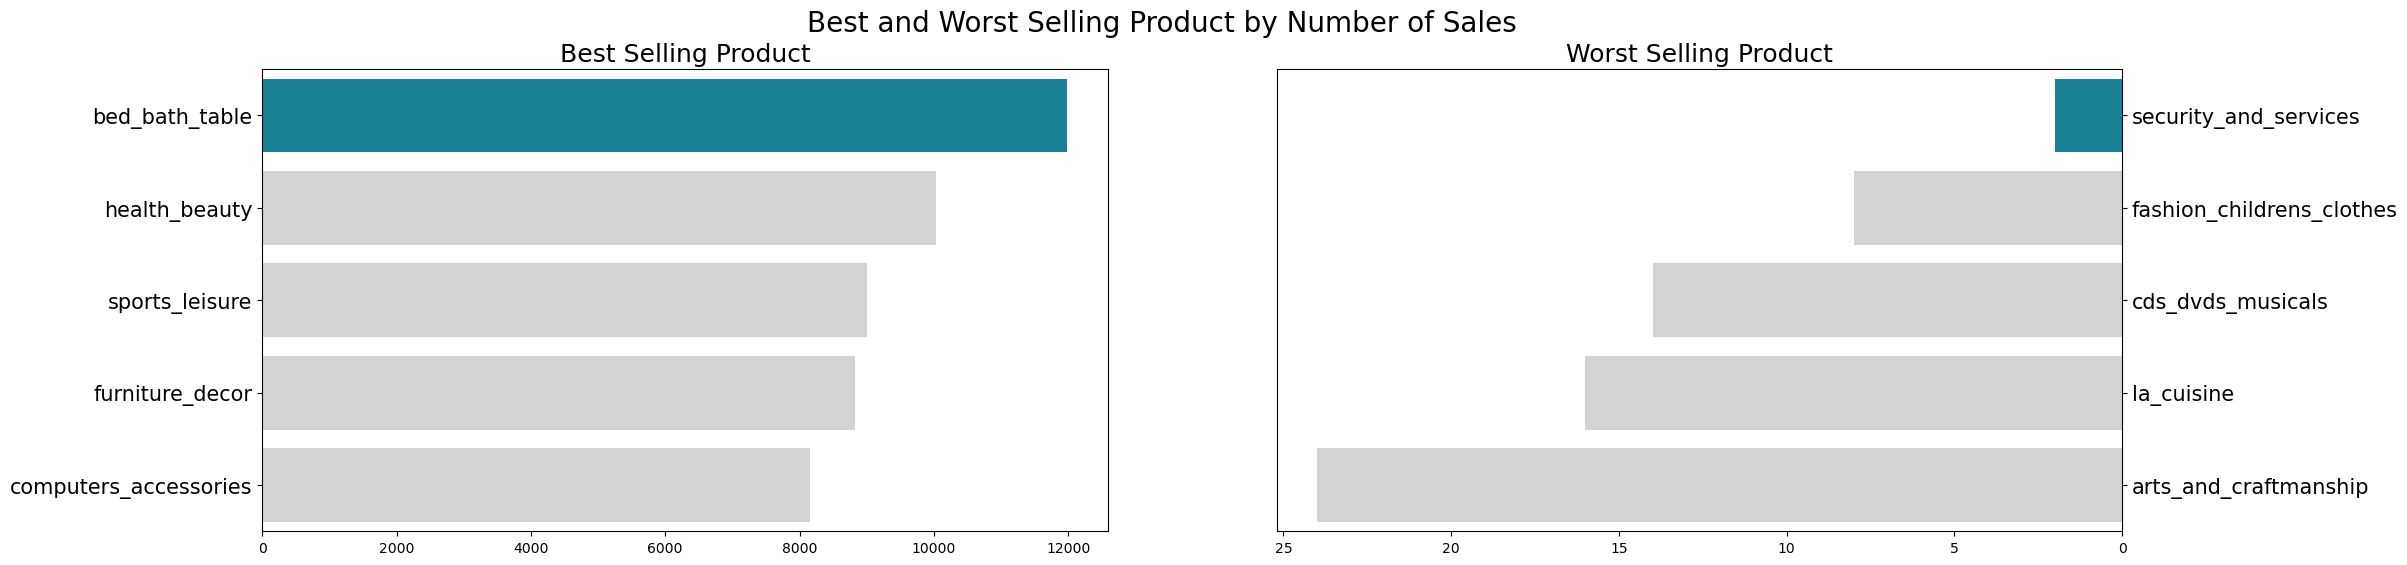

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count_x", y="product_category", data=sum_order_df.head(5), palette=colors, ax=ax[0], hue="product_category", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="count_x", y="product_category", data=sum_order_df.sort_values(by="count_x", ascending=True).head(5), palette=colors, ax=ax[1], hue="product_category", legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Selling Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Selling Product by Number of Sales", fontsize=20)
plt.show()

Dari grafik di atas, dapat disimpulkan bahwa kategori produk yang paling diminati oleh pelanggan adalah "bed_bath_table" dengan 11988 penjualan, sedangkan produk "security and services" merupakan produk yang memiliki penjualan paling rendah, hanya 2 penjualan.

### 2. Bagaimana tingkat kepuasan customer?

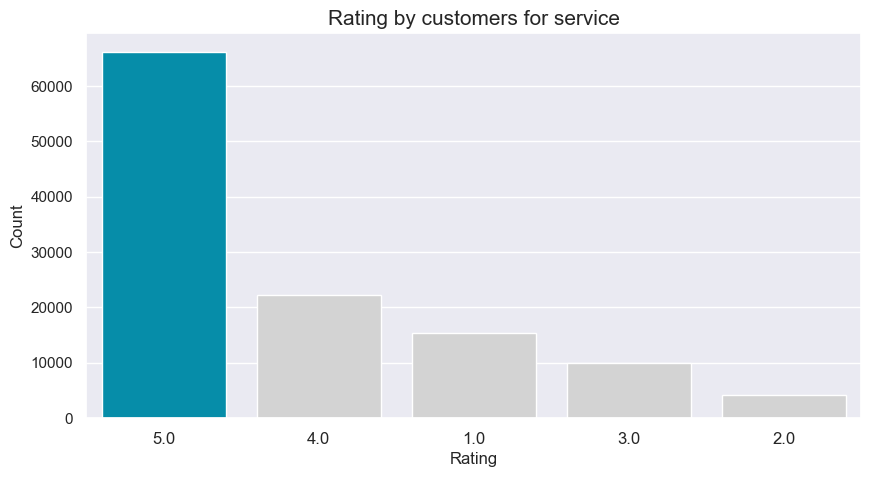

In [59]:

review_scores = all_data["review_score"].value_counts().sort_values(ascending=False)
most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

# Buat barplot tanpa warna custom dulu
barplot = sns.barplot(
    x=review_scores.index,
    y=review_scores.values,
    order=review_scores.index,
    color="#D3D3D3",  # default gray
)

# Warnai bar yang paling sering
for i, patch in enumerate(barplot.patches):
    score = review_scores.index[i]
    if score == most_common_score:
        patch.set_facecolor("#068DA9")  # warna biru

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

In [60]:
print(f"Rating Average  : {all_data['review_score'].mean():.2f}")

Rating Average  : 4.02


Grafik di atas mencerminkan tingkat kepuasan pelanggan yang tinggi terhadap layanan yang diberikan. Hal ini dapat dilihat dari jumlah pelanggan yang memberikan rating 5 memiliki jumlah data yang paling banyak dibandingkan dengan rating lainnya dan rata-rata rating 4.02

### 3. Bagaimana performa penjualan E-Commerce kami seiring berjalannya waktu?

In [61]:
monthly_df = all_data.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
})

#mengubah format order_approved_at menjadi Tahun ke Bulan
monthly_df.index = monthly_df.index.strftime('%B') 
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={"order_id": "order_count",}, inplace=True)
monthly_df.head()

,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [62]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [63]:
monthly_df.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [64]:
monthly_df.sort_values(by='order_count')

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


In [65]:

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

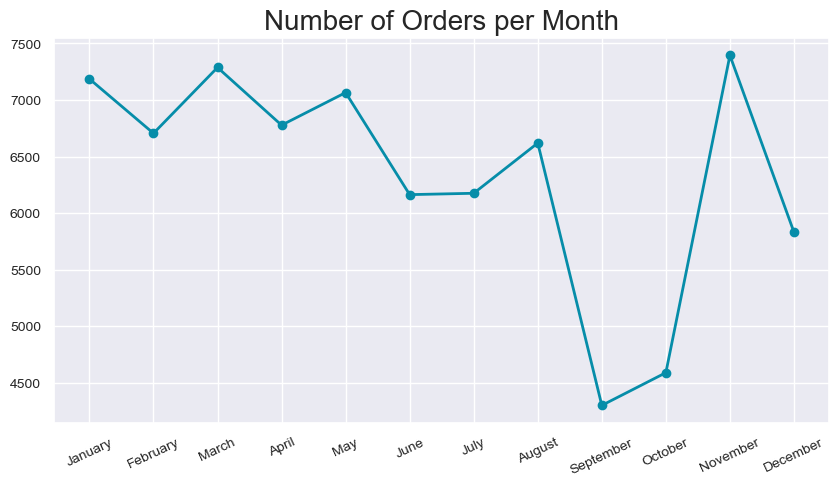

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Dari visualisasi grafik, terlihat adanya penurunan yang cukup besar pada bulan September dan kenaikan yang signifikan pada bulan November.

## Analisis Lanjutan (Opsional)

## RFM Analysis
RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan dengan mengelompokkan pelangga ke dalam beberapa kategori:
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [93]:
rfm_df = all_data.groupby(by="customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max",
        "order_id": "count",
        "price": "sum"
})
rfm_df.columns =["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data["order_purchase_timestamp"].dt.date.max() + dt.timedelta(days=1)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,338
1,000161a058600d5901f007fab4c27140,1,54.90,459
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,597
3,0002414f95344307404f0ace7a26f1d5,1,149.90,428
4,000379cdec625522490c315e70c7a9fb,1,93.00,199


#### Recency

In [95]:
recency_df = rfm_df.sort_values(by='recency', ascending=False)
recency_df.head()

,customer_id,frequency,monetary,recency
3354,08c5351a6aca1c1589a38f244edeee9d,2,72.89,774
40289,683c54fc24d40ee9f8a6fc179fd9856c,1,59.50,773
38013,622e13439d6b5a0b486c435618b2679e,1,0.00,765
52277,86dc2ffce2dfff336de2f386a786e574,3,134.97,763
68946,b106b360fe2ef8849fbbd056f777b4d5,1,100.00,746


In [97]:
print(recency_df.recency.mean())

291.27295582305084


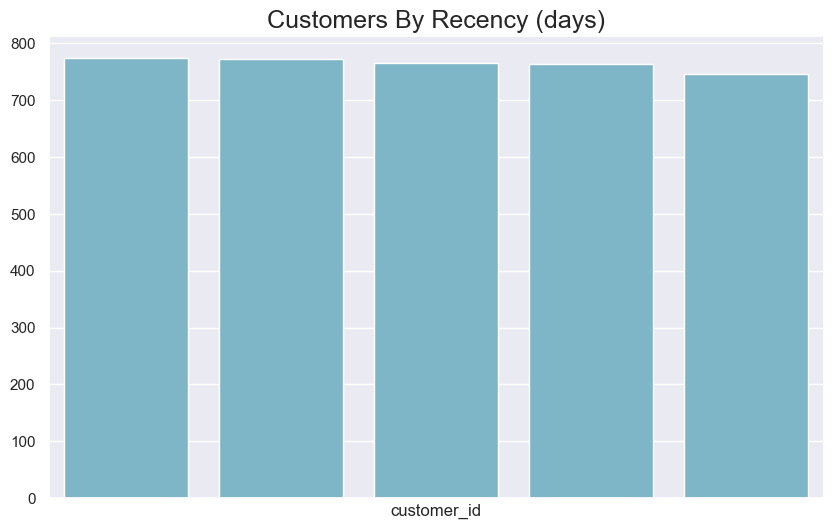

In [98]:
plt.figure(figsize=(10, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency",
    x="customer_id",
    data=recency_df.sort_values(by="recency", ascending=False).head(5),
    palette=colors,
    hue='customer_id',
    legend=False
)

plt.ylabel(None)
plt.xlabel("customer_id")
plt.title("Customers By Recency (days)", fontsize=18)
plt.xticks([])

plt.show()

Dari hasil visualisasi, ditemukan pelanggan yang telah tidak melakukan transaksi selama 774 hari, menunjukkan tingkat ketidakaktifan yang paling tinggi di antara pelanggan lainnya.

#### Frequency

In [94]:
frequency_df = rfm_df.sort_values(by='frequency', ascending=False)
frequency_df.head()

,customer_id,frequency,monetary,recency
15183,270c23a11d024a44c896d1894b261a83,63,2305.38,436
7586,13aa59158da63ba0e93ec6ac2c07aacb,38,3039.62,390
60184,9af2372a1e49340278e7c1ef8d749f34,29,11383.95,546
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,1299.74,498
52255,86cc80fef09f7f39df4b0dbce48e81cb,24,2914.68,468


In [69]:
print(frequency_df.frequency.mean())

1.1958447722770287


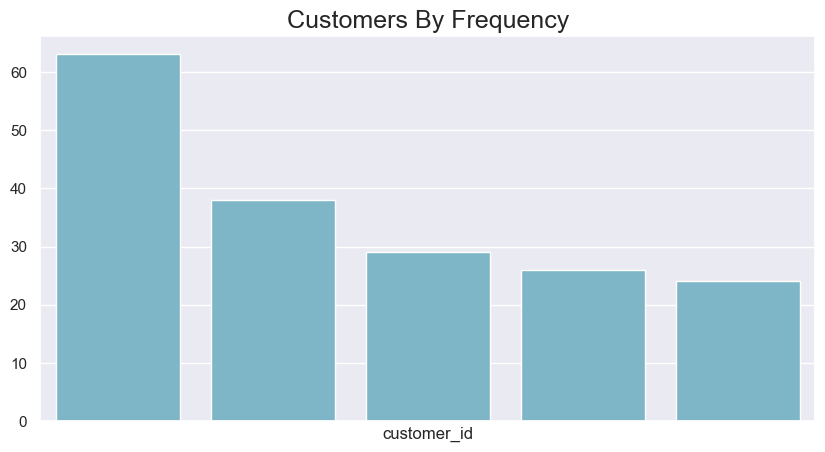

In [90]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="frequency",
    x="customer_id",
    data=frequency_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    hue='customer_id',
    legend=False
)

plt.ylabel(None)
plt.xlabel("customer_id")
plt.title("Customers By Frequency", fontsize=18)
plt.xticks([])

plt.show()

Dari hasil visualisasi, pelanggan dengan frekuensi transaksi tertinggi tercatat melakukan 63 transaksi.

#### Monetary

In [74]:
monetary_df = rfm_df.sort_values(by='monetary', ascending=False)
monetary_df.head()

,customer_id,frequency,monetary,recency
8546,1617b1357756262bfa56ab541c47bc16,8,13440.00,384
60184,9af2372a1e49340278e7c1ef8d749f34,29,11383.95,546
86603,de832e8dbb1f588a47013e53feaa67cc,15,10856.10,507
38590,63b964e79dee32a3587651701a2b8dbf,24,9888.00,246
43009,6f241d5bbb142b6f764387c8c270645a,7,9520.14,161


In [75]:
print(monetary_df.monetary.mean())

141.59048310053197


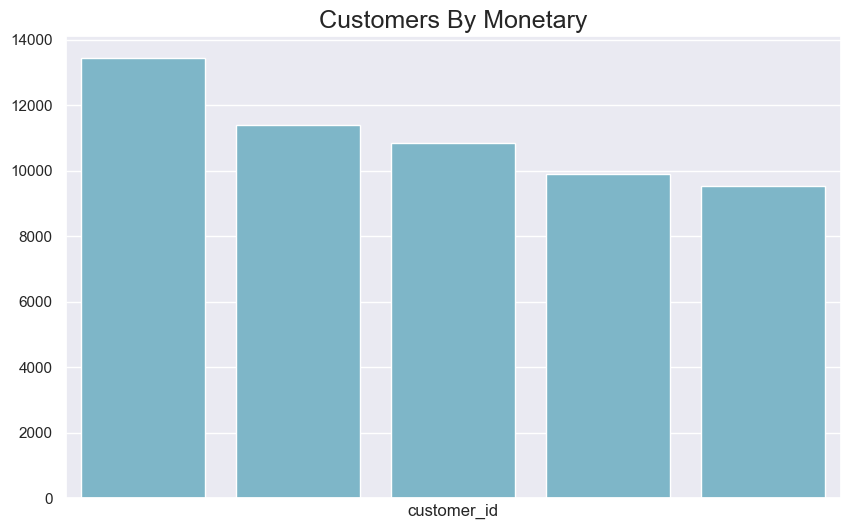

In [92]:
plt.figure(figsize=(10, 6))

sns.barplot(
    y="monetary",
    x="customer_id",
    data=monetary_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    hue='customer_id',
    legend=False
)

plt.ylabel(None)
plt.xlabel("customer_id")
plt.title("Customers By Monetary", fontsize=18)
plt.xticks([])

plt.show()

Dari hasil visualisasi, pelanggan dengan total pembelanjaan terbesar telah menghabiskan 13440.00.

## Conclusion

### Produk apa yang memiliki penjualan tertinggi dan terendah?

Berdasarkan analisis data penjualan produk, ditemukan bahwa kategori "bed_bath_table" menjadi produk dengan tingkat penjualan tertinggi, mencapai 11.988 unit. Hal ini menunjukkan bahwa produk-produk yang berkaitan dengan kebutuhan rumah tangga memiliki tingkat permintaan yang tinggi dari pelanggan.  Sebaliknya kategori "security_and_services" mencatatkan jumlah penjualan paling rendah, yaitu hanya 2 unit. Hal ini dapat mengindikasikan bahwa produk atau layanan dalam kategori ini kurang diminati oleh pelanggan.

### Bagaimana tingkat kepuasan customer?

Berdasarkan analisis data kepuasan pelanggan terhadap layanan e-commerce, dapat disimpulkan bahwa tingkat kepuasan pelanggan secara umum berada pada level yang sangat baik. Hal ini tercermin dari mayoritas pelanggan yang memberikan rating 5, diikuti oleh rating 4 sebagai jumlah terbanyak kedua. Secara keseluruhan, rata-rata rating yang diperoleh adalah 4,02, yang menunjukkan bahwa sebagian besar pelanggan merasa puas dengan layanan yang diberikan.

Namun, perlu diperhatikan bahwa meskipun mayoritas rating berada pada angka 5 dan 4, masih terdapat pelanggan yang memberikan rating lebih rendah, seperti rating 1, 2, dan 3. Jumlah pelanggan dengan rating rendah memang jauh lebih sedikit, namun tetap menjadi indikator adanya sebagian kecil pelanggan yang merasa kurang puas terhadap layanan yang diterima.

### Bagaimana performa penjualan E-Commerce seiring berjalannya waktu?

Berdasarkan analisis performa penjualan e-commerce dari bulan ke bulan, ditemukan adanya fluktuasi yang signifikan sepanjang periode yang diamati. Penjualan terendah terjadi pada bulan September, dengan total 4.301 unit terjual. Sebaliknya, penjualan tertinggi tercapai pada bulan November, dengan angka 7.395 unit terjual.


### Kapan terakhir pelanggan melakukan transaksi?

Berdasarkan hasil analisis data, ditemukan adanya pelanggan yang telah tidak melakukan transaksi selama 774 hari, menjadikannya sebagai pelanggan dengan tingkat ketidakaktifan tertinggi di antara pelanggan lainnya. Fakta ini menunjukkan adanya segmen pelanggan yang berpotensi mengalami churn (kehilangan pelanggan secara permanen) apabila tidak segera ditindaklanjuti.

### Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

Berdasarkan hasil analisis data, ditemukan bahwa pelanggan dengan frekuensi transaksi tertinggi telah melakukan 63 transaksi sepanjang periode pengamatan. Hal ini menunjukkan adanya segmen pelanggan yang sangat aktif dan memiliki tingkat loyalitas yang tinggi terhadap platform e-commerce ini.

### Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

Berdasarkan hasil analisis data, ditemukan bahwa pelanggan dengan total pembelanjaan terbesar telah menghabiskan sebesar 13440,00 dalam transaksi di platform e-commerce yang memberikan kontribusi signifikan terhadap pendapatan perusahaan. Pelanggan dengan tingkat pembelanjaan tinggi ini kemungkinan besar memiliki tingkat loyalitas yang kuat, kepuasan terhadap produk dan layanan, serta daya beli yang lebih besar dibanding pelanggan lainnya.

Menjaga hubungan baik dengan pelanggan tipe ini sangat penting, karena mereka tidak hanya menyumbang penjualan langsung dalam jumlah besar, tetapi juga berpotensi menjadi promotor yang merekomendasikan layanan e-commerce kepada pelanggan baru.